In [ ]:
pip install numpy scikit-fuzzy matplotlib networkx

In [ ]:
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import numpy as np
import matplotlib.pyplot as plt

FUZZY SUKAMOTO

In [8]:
# Variabel input: Luas Lahan (hektar) & Produksi Padi (ton/hektar)
luas_lahan = ctrl.Antecedent(np.arange(0, 6.1, 0.1), 'luas_lahan')
produksi_padi = ctrl.Antecedent(np.arange(2, 8.1, 0.1), 'produksi_padi')

# Variabel output: Subsidi (juta rupiah per hektar)
subsidi = ctrl.Consequent(np.arange(1, 7.1, 0.1), 'subsidi')

In [9]:
# Fungsi keanggotaan untuk Luas Lahan
luas_lahan['kecil'] = fuzz.trimf(luas_lahan.universe, [0, 1, 2])
luas_lahan['sedang'] = fuzz.trimf(luas_lahan.universe, [1.5, 2.75, 4])
luas_lahan['besar'] = fuzz.trimf(luas_lahan.universe, [3, 4.5, 6])

# Fungsi keanggotaan untuk Produksi Padi
produksi_padi['rendah'] = fuzz.trimf(produksi_padi.universe, [2, 3, 4])
produksi_padi['sedang'] = fuzz.trimf(produksi_padi.universe, [3, 4.5, 6])
produksi_padi['tinggi'] = fuzz.trimf(produksi_padi.universe, [5, 6.5, 8])

# Fungsi keanggotaan untuk Subsidi
subsidi['rendah'] = fuzz.trimf(subsidi.universe, [1, 2, 3])
subsidi['sedang'] = fuzz.trimf(subsidi.universe, [2, 3.5, 5])
subsidi['tinggi'] = fuzz.trimf(subsidi.universe, [4, 5.5, 7])

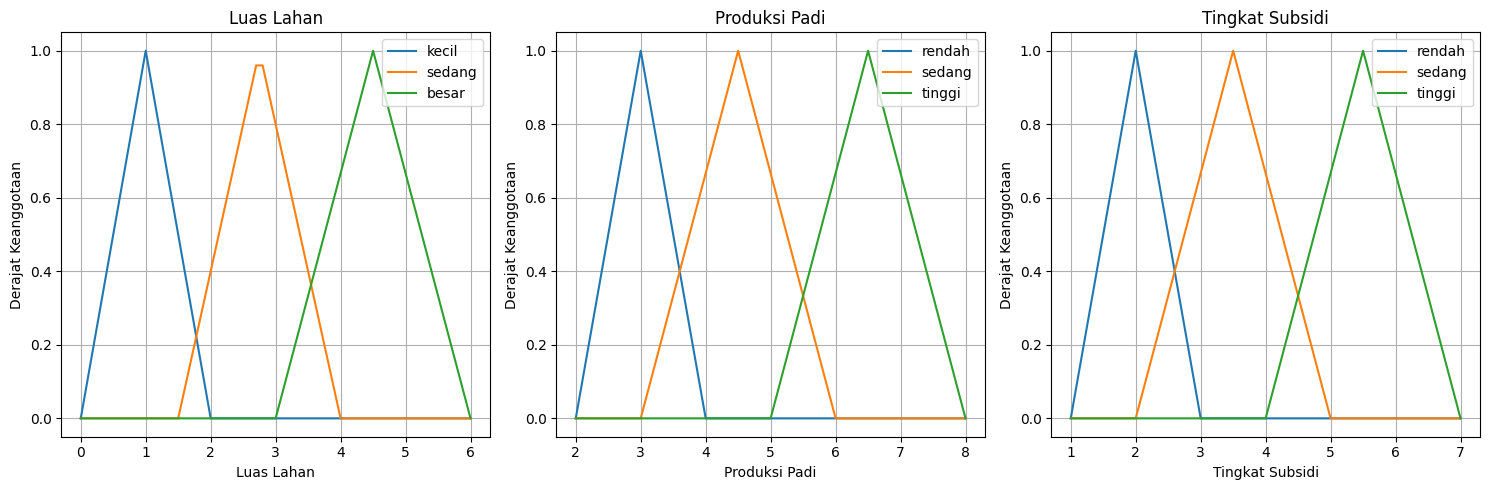

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Fungsi untuk menampilkan grafik dalam subplot
def plot_membership(var, title, ax):
    for term, mf in var.terms.items():
        ax.plot(var.universe, mf.mf, label=term)
    ax.set_title(title)
    ax.set_xlabel(title)
    ax.set_ylabel('Derajat Keanggotaan')
    ax.legend()
    ax.grid()

# Plot masing-masing grafik ke subplot
plot_membership(luas_lahan, 'Luas Lahan', axes[0])
plot_membership(produksi_padi, 'Produksi Padi', axes[1])
plot_membership(subsidi, 'Tingkat Subsidi', axes[2])

# Menyesuaikan layout agar tidak bertumpuk
plt.tight_layout()
plt.show()

In [18]:
rule1 = ctrl.Rule(luas_lahan['kecil'] & produksi_padi['rendah'], subsidi['tinggi'])
rule2 = ctrl.Rule(luas_lahan['kecil'] & produksi_padi['sedang'], subsidi['sedang'])
rule3 = ctrl.Rule(luas_lahan['kecil'] & produksi_padi['tinggi'], subsidi['rendah'])
rule4 = ctrl.Rule(luas_lahan['sedang'] & produksi_padi['rendah'], subsidi['tinggi'])
rule5 = ctrl.Rule(luas_lahan['sedang'] & produksi_padi['sedang'], subsidi['sedang'])
rule6 = ctrl.Rule(luas_lahan['sedang'] & produksi_padi['tinggi'], subsidi['rendah'])
rule7 = ctrl.Rule(luas_lahan['besar'] & produksi_padi['rendah'], subsidi['sedang'])
rule8 = ctrl.Rule(luas_lahan['besar'] & produksi_padi['sedang'], subsidi['rendah'])
rule9 = ctrl.Rule(luas_lahan['besar'] & produksi_padi['tinggi'], subsidi['rendah'])

=== HASIL FUZZY TSUKAMOTO ===
Luas Lahan       : 3.2 hektar
Produksi Padi    : 5 ton/hektar
Nilai Subsidi    : 3.32 juta rupiah per hektar


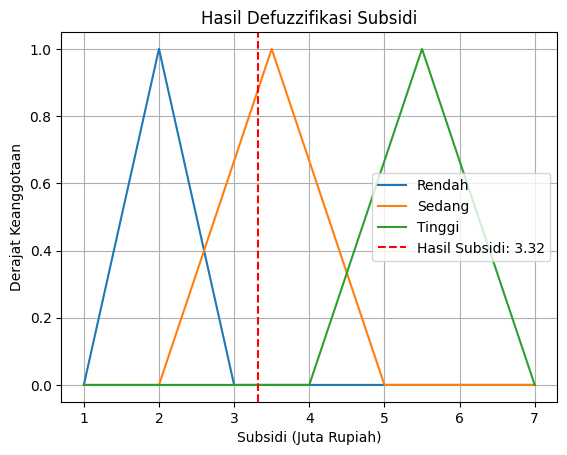

In [ ]:
# Buat sistem kontrol fuzzy
subsidi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
subsidi_simulasi = ctrl.ControlSystemSimulation(subsidi_ctrl)

# Masukkan input data
luas_input = 3.2
produksi_input = 5 

subsidi_simulasi.input['luas_lahan'] = luas_input
subsidi_simulasi.input['produksi_padi'] = produksi_input

# Hitung hasil
subsidi_simulasi.compute()

# Cetak hasil
hasil_subsidi = subsidi_simulasi.output['subsidi']
print(f'=== HASIL FUZZY TSUKAMOTO ===')
print(f'Luas Lahan       : {luas_input} hektar')
print(f'Produksi Padi    : {produksi_input} ton/hektar')
print(f'Nilai Subsidi    : {hasil_subsidi:.2f} juta rupiah per hektar')

# Visualisasi hasil keputusan subsidi
plt.figure()
plt.plot(subsidi.universe, fuzz.trimf(subsidi.universe, [1, 2, 3]), label='Rendah')
plt.plot(subsidi.universe, fuzz.trimf(subsidi.universe, [2, 3.5, 5]), label='Sedang')
plt.plot(subsidi.universe, fuzz.trimf(subsidi.universe, [4, 5.5, 7]), label='Tinggi')
plt.axvline(hasil_subsidi, color='r', linestyle='--', label=f'Hasil Subsidi: {hasil_subsidi:.2f}')
plt.title('Hasil Defuzzifikasi Subsidi')
plt.xlabel('Subsidi (Juta Rupiah)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid()
plt.show()

FUZZY SUGIONO

In [22]:
# Buat variabel input
luas_lahan_sugeno = ctrl.Antecedent(np.arange(0, 6.1, 0.1), 'luas_lahan')
produksi_padi_sugeno = ctrl.Antecedent(np.arange(2, 8.1, 0.1), 'produksi_padi')

# Variabel output Sugeno (konstan untuk setiap aturan)
subsidi_sugeno = ctrl.Consequent(np.arange(1, 7.1, 0.1), 'subsidi', defuzzify_method='wtaver')

In [35]:
# Fungsi Keanggotaan (sama seperti Tsukamoto)
luas_lahan_sugeno['kecil'] = fuzz.trimf(luas_lahan_sugeno.universe, [0, 1, 2])
luas_lahan_sugeno['sedang'] = fuzz.trimf(luas_lahan_sugeno.universe, [1.5, 2.75, 4])
luas_lahan_sugeno['besar'] = fuzz.trimf(luas_lahan_sugeno.universe, [3, 4.5, 6])

produksi_padi_sugeno['rendah'] = fuzz.trimf(produksi_padi_sugeno.universe, [2, 3, 4])
produksi_padi_sugeno['sedang'] = fuzz.trimf(produksi_padi_sugeno.universe, [3, 4.5, 6])
produksi_padi_sugeno['tinggi'] = fuzz.trimf(produksi_padi_sugeno.universe, [5, 6.5, 8])

# Nilai output Sugeno (konstan)
subsidi_sugeno = ctrl.Consequent(np.arange(0, 10, 0.1), 'subsidi_sugeno', defuzzify_method='centroid')
subsidi_sugeno['rendah'] = fuzz.trimf(subsidi_sugeno.universe, [1, 2, 3])
subsidi_sugeno['sedang'] = fuzz.trimf(subsidi_sugeno.universe, [2, 3.5, 5])
subsidi_sugeno['tinggi'] = fuzz.trimf(subsidi_sugeno.universe, [4, 5.5, 7])

In [38]:
# Aturan Inferensi (sama dengan Tsukamoto tetapi output konstan)
rule1_sugeno = ctrl.Rule(luas_lahan_sugeno['kecil'] & produksi_padi_sugeno['rendah'], subsidi_sugeno['tinggi'])
rule2_sugeno = ctrl.Rule(luas_lahan_sugeno['kecil'] & produksi_padi_sugeno['sedang'], subsidi_sugeno['sedang'])
rule3_sugeno = ctrl.Rule(luas_lahan_sugeno['kecil'] & produksi_padi_sugeno['tinggi'], subsidi_sugeno['rendah'])
rule4_sugeno = ctrl.Rule(luas_lahan_sugeno['sedang'] & produksi_padi_sugeno['rendah'], subsidi_sugeno['tinggi'])
rule5_sugeno = ctrl.Rule(luas_lahan_sugeno['sedang'] & produksi_padi_sugeno['sedang'], subsidi_sugeno['sedang'])
rule6_sugeno = ctrl.Rule(luas_lahan_sugeno['sedang'] & produksi_padi_sugeno['tinggi'], subsidi_sugeno['rendah'])
rule7_sugeno = ctrl.Rule(luas_lahan_sugeno['besar'] & produksi_padi_sugeno['rendah'], subsidi_sugeno['sedang'])
rule8_sugeno = ctrl.Rule(luas_lahan_sugeno['besar'] & produksi_padi_sugeno['sedang'], subsidi_sugeno['rendah'])
rule9_sugeno = ctrl.Rule(luas_lahan_sugeno['besar'] & produksi_padi_sugeno['tinggi'], subsidi_sugeno['rendah'])

=== HASIL FUZZY SUGENO ===
Luas Lahan       : 3.2 hektar
Produksi Padi    : 5 ton/hektar
Nilai Subsidi    : 3.32 juta rupiah per hektar


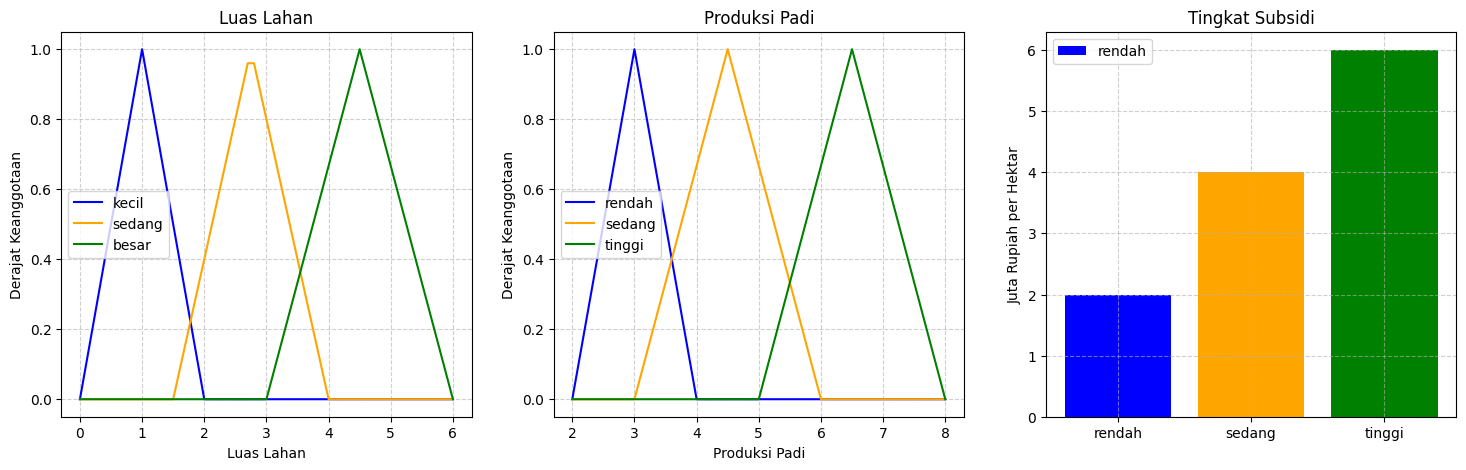

In [41]:
# Buat sistem kontrol fuzzy Sugeno
subsidi_ctrl_sugeno = ctrl.ControlSystem([rule1_sugeno, rule2_sugeno, rule3_sugeno, rule4_sugeno, rule5_sugeno, rule6_sugeno, rule7_sugeno, rule8_sugeno, rule9_sugeno])
subsidi_simulasi_sugeno = ctrl.ControlSystemSimulation(subsidi_ctrl_sugeno)

subsidi_simulasi_sugeno.input['luas_lahan'] = luas_input
subsidi_simulasi_sugeno.input['produksi_padi'] = produksi_input

# Hitung hasil Sugeno
subsidi_simulasi_sugeno.compute()
hasil_subsidi_sugeno = subsidi_simulasi_sugeno.output['subsidi_sugeno']

# Cetak hasil
print(f'=== HASIL FUZZY SUGENO ===')
print(f'Luas Lahan       : {luas_input} hektar')
print(f'Produksi Padi    : {produksi_input} ton/hektar')
print(f'Nilai Subsidi    : {hasil_subsidi_sugeno:.2f} juta rupiah per hektar')

# Visualisasi Fungsi Keanggotaan
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Grafik Luas Lahan
axes[0].plot(luas_lahan_sugeno.universe, luas_lahan_sugeno['kecil'].mf, 'b', label='kecil')
axes[0].plot(luas_lahan_sugeno.universe, luas_lahan_sugeno['sedang'].mf, 'orange', label='sedang')
axes[0].plot(luas_lahan_sugeno.universe, luas_lahan_sugeno['besar'].mf, 'g', label='besar')
axes[0].set_title('Luas Lahan')
axes[0].set_xlabel('Luas Lahan')
axes[0].set_ylabel('Derajat Keanggotaan')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)  # Garis bantu

# Grafik Produksi Padi
axes[1].plot(produksi_padi_sugeno.universe, produksi_padi_sugeno['rendah'].mf, 'b', label='rendah')
axes[1].plot(produksi_padi_sugeno.universe, produksi_padi_sugeno['sedang'].mf, 'orange', label='sedang')
axes[1].plot(produksi_padi_sugeno.universe, produksi_padi_sugeno['tinggi'].mf, 'g', label='tinggi')
axes[1].set_title('Produksi Padi')
axes[1].set_xlabel('Produksi Padi')
axes[1].set_ylabel('Derajat Keanggotaan')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)  # Garis bantu

# Grafik Tingkat Subsidi
subsidi_levels = [2, 4, 6]
subsidi_names = ['rendah', 'sedang', 'tinggi']
axes[2].bar(subsidi_names, subsidi_levels, color=['blue', 'orange', 'green'])
axes[2].set_title('Tingkat Subsidi')
axes[2].set_ylabel('Juta Rupiah per Hektar')
axes[2].legend(subsidi_names)
axes[2].grid(True, linestyle='--', alpha=0.6)  # Garis bantu

plt.show()

PERBANGINGAN TSUKAMOTO DAN SUGENO

In [42]:
print(f'\n=== PERBANDINGAN HASIL ===')
print(f'Metode Tsukamoto  : {hasil_subsidi:.2f} juta rupiah')
print(f'Metode Sugeno     : {hasil_subsidi_sugeno:.2f} juta rupiah')

# Perbedaan metode
if hasil_subsidi > hasil_subsidi_sugeno:
    print('Metode Tsukamoto memberikan subsidi lebih tinggi dibanding Sugeno.')
elif hasil_subsidi < hasil_subsidi_sugeno:
    print('Metode Sugeno memberikan subsidi lebih tinggi dibanding Tsukamoto.')
else:
    print('Kedua metode menghasilkan nilai subsidi yang sama.')



=== PERBANDINGAN HASIL ===
Metode Tsukamoto  : 3.32 juta rupiah
Metode Sugeno     : 3.32 juta rupiah
Metode Tsukamoto memberikan subsidi lebih tinggi dibanding Sugeno.
